In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.modeling.models import BlackBody
from scipy.interpolate import interp1d

In [2]:
def create_ring(a1, b1, ecc, inc, ring_ratio, ring_temp, width, height):
    array = np.zeros((height, width), dtype=np.float32)
    
    x0 = width // 2
    y0 = height // 2
    
    inc_rad = np.radians(inc)
    cos_inc = np.cos(-inc_rad)  # negative sign to invert the angle
    sin_inc = np.sin(-inc_rad)  
    
    # Calculate blackbody emission spectrum
    temp = ring_temp * u.K
    wav = np.linspace(1e-6, 100e-6, 1000) * u.meter
    bb_ring = BlackBody(temperature=temp)
    flux_den_ring = bb_ring(wav)
    max_intensity = np.max(flux_den_ring)
    flux_den_ring_scaled = (2 / max_intensity) * flux_den_ring
    interp_fd_ring = interp1d(np.arange(len(flux_den_ring_scaled)), flux_den_ring_scaled)(np.linspace(0, len(flux_den_ring_scaled) - 1, num=height))
    
    def transform(x, y, x0, y0, cos_inc, sin_inc):
        norm_x = x - x0
        norm_y = y - y0
        transformed_x = norm_x * cos_inc - norm_y * sin_inc
        transformed_y = norm_x * sin_inc + norm_y * cos_inc
        return transformed_x, transformed_y

    # Outer ellipse
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a1**2 * (1 - ecc**2)) + transformed_y**2 / (b1**2) <= 1:
                dist = np.sqrt((x - x0)**2 + (y - y0)**2)
                intensity = 2 + 200 * np.exp(-dist**2 / (2 * (0.1 * width)**2))
                array[y, x] = intensity * interp_fd_ring[y]
    
    # Inner ellipse
    a2 = a1 * ring_ratio
    b2 = b1 * ring_ratio
    
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a2**2 * (1 - ecc**2)) + transformed_y**2 / (b2**2) <= 1:
                array[y, x] = 0
    
    return array

In [3]:
def create_gap(a1, b1, ecc, inc, gap_ratio, width, height):
    array = np.zeros((height, width), dtype=np.float32)
    
    x0 = width // 2
    y0 = height // 2
    
    inc_rad = np.radians(inc)
    cos_inc = np.cos(-inc_rad)  # negative sign to invert the angle
    sin_inc = np.sin(-inc_rad)
    
    def transform(x, y, x0, y0, cos_inc, sin_inc):
        norm_x = x - x0
        norm_y = y - y0
        transformed_x = norm_x * cos_inc - norm_y * sin_inc
        transformed_y = norm_x * sin_inc + norm_y * cos_inc
        return transformed_x, transformed_y

    # Outer ellipse
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a1**2 * (1 - ecc**2)) + transformed_y**2 / (b1**2) <= 1:
                array[y, x] = 0
    
    # Inner ellipse
    a2 = a1 * gap_ratio
    b2 = b1 * gap_ratio
    
    for y in range(height):
        for x in range(width):
            transformed_x, transformed_y = transform(x, y, x0, y0, cos_inc, sin_inc)
            if transformed_x**2 / (a2**2 * (1 - ecc**2)) + transformed_y**2 / (b2**2) <= 1:
                array[y, x] = 0
    
    return array

In [4]:
width, height = 200, 200
ring1 = create_ring(72, 49, 0.3, 40, 0.96, 50, width, height) #B7
ring2 = create_ring(65, 45, 0.3, 40, 0.93, 60, width, height) #B6
ring3 = create_ring(56, 40, 0.3, 40, 0.97, 80,  width, height) #B5
ring4 = create_ring(49, 35, 0.3, 40, 0.9, 100, width, height) #B4
ring5 = create_ring(44, 31, 0.3, 40, 0.8, 120, width, height) #B3
ring6 = create_ring(35, 25, 0.3, 40, 0.7, 150,  width, height) #B2
ring7 = create_ring(20, 15, 0.3, 40, 0.45, 200, width, height) #B1

In [5]:
hl_tauri_rings = ring1 + ring2 + ring3 + ring4 + ring5 + ring6 + ring7

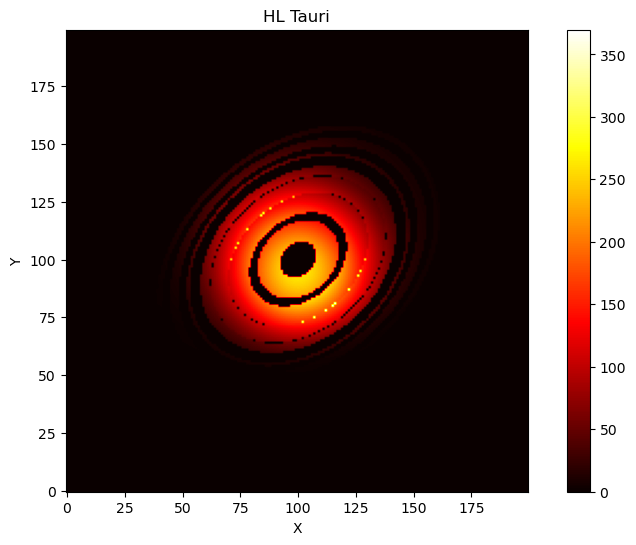

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(hl_tauri_rings, cmap='hot', origin='lower')
plt.title('HL Tauri')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [7]:
width, height = 2000, 2000
ring1 = create_ring(720, 490, 0.3, 40, 0.96, 50, width, height) #B7
ring2 = create_ring(650, 450, 0.3, 40, 0.93, 60, width, height) #B6
ring3 = create_ring(560, 400, 0.3, 40, 0.97, 80, width, height) #B5
ring4 = create_ring(490, 348, 0.3, 40, 0.9, 100, width, height) #B4
ring5 = create_ring(440, 313, 0.3, 40, 0.8, 120, width, height) #B3
ring6 = create_ring(350, 250, 0.3, 40, 0.7, 150, width, height) #B2
ring7 = create_ring(200, 150, 0.3, 40, 0.45, 200, width, height) #B1

In [8]:
hl_tauri_rings = ring1 + ring2 + ring3 + ring4 + ring5 + ring6 + ring7

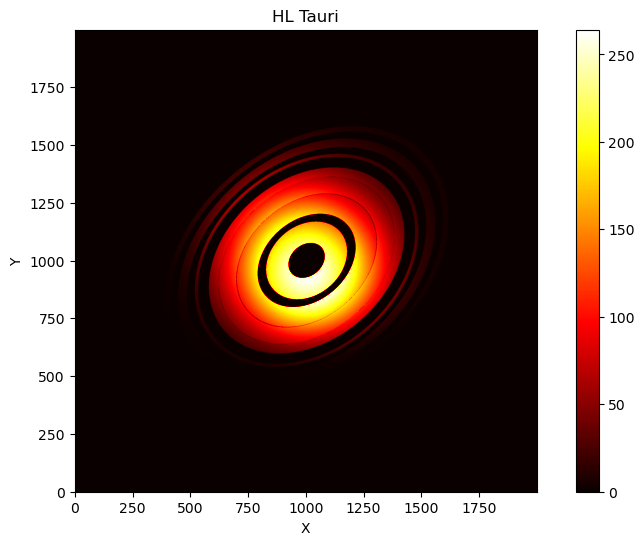

In [9]:
plt.figure(figsize=(10, 6))
plt.imshow(hl_tauri_rings, cmap='hot', origin='lower')
plt.title('HL Tauri')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [2]:
import scopesim as sim
from astropy import units as u
from scopesim.source import source_templates as sim_tp
from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy.wcs import WCS

In [3]:
src_star = sim_tp.star(flux=10*u.ABmag)

In [12]:
filename = 'ring1.fits'
hdu1 = fits.PrimaryHDU(ring1)
hdu1.writeto(filename, overwrite=True)

In [13]:
filename = 'ring2.fits'
hdu2 = fits.PrimaryHDU(ring2)
hdu2.writeto(filename, overwrite=True)

In [14]:
filename = 'ring3.fits'
hdu3 = fits.PrimaryHDU(ring3)
hdu3.writeto(filename, overwrite=True)

In [15]:
filename = 'ring4.fits'
hdu4 = fits.PrimaryHDU(ring4)
hdu4.writeto(filename, overwrite=True)

In [16]:
filename = 'ring5.fits'
hdu5 = fits.PrimaryHDU(ring5)
hdu5.writeto(filename, overwrite=True)

In [17]:
filename = 'ring6.fits'
hdu5 = fits.PrimaryHDU(ring6)
hdu5.writeto(filename, overwrite=True)

In [18]:
filename = 'ring7.fits'
hdu5 = fits.PrimaryHDU(ring7)
hdu5.writeto(filename, overwrite=True)

In [4]:
flux_src = 1e-5*u.Jy

In [64]:
hdul1 = fits.open('ring1.fits') 
hdul1[0].header["CDELT1"] = (0.0057 / 3600)   #CD1_1 
hdul1[0].header["CDELT2"] = (0.0057 / 3600)   #CD2_2 #für metis 0.0057 / 3600
hdul1[0].header["CRVAL1"] = 0
hdul1[0].header["CRVAL2"] = 0
hdul1[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul1[0].header["CRPIX2"] = 1000.5
hdul1[0].header["CUNIT1"] = "deg"
hdul1[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring1 = sim.Source(image_hdu=hdul1[0], flux=flux_src)

In [65]:
hdul2 = fits.open('ring2.fits') 
hdul2[0].header["CDELT1"] = (0.0057 / 3600)   #CD1_1 
hdul2[0].header["CDELT2"] = (0.0057 / 3600)   #CD2_2 #für metis 0.0057 / 3600
hdul2[0].header["CRVAL1"] = 0
hdul2[0].header["CRVAL2"] = 0
hdul2[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul2[0].header["CRPIX2"] = 1000.5
hdul2[0].header["CUNIT1"] = "deg"
hdul2[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring2 = sim.Source(image_hdu=hdul2[0], flux=flux_src)

In [66]:
hdul3 = fits.open('ring3.fits') 
hdul3[0].header["CDELT1"] = (0.0057 / 3600)   #CD1_1 
hdul3[0].header["CDELT2"] = (0.0057 / 3600)   #CD2_2 #für metis 0.0057 / 3600
hdul3[0].header["CRVAL1"] = 0
hdul3[0].header["CRVAL2"] = 0
hdul3[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul3[0].header["CRPIX2"] = 1000.5
hdul3[0].header["CUNIT1"] = "deg"
hdul3[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring3 = sim.Source(image_hdu=hdul3[0], flux=flux_src)

In [67]:
hdul4 = fits.open('ring4.fits') 
hdul4[0].header["CDELT1"] = (0.0057 / 3600)   #CD1_1 
hdul4[0].header["CDELT2"] = (0.0057 / 3600)   #CD2_2 #für metis 0.0057 / 3600
hdul4[0].header["CRVAL1"] = 0
hdul4[0].header["CRVAL2"] = 0
hdul4[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul4[0].header["CRPIX2"] = 1000.5
hdul4[0].header["CUNIT1"] = "deg"
hdul4[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring4 = sim.Source(image_hdu=hdul4[0], flux=flux_src)

In [68]:
hdul5 = fits.open('ring5.fits') 
hdul5[0].header["CDELT1"] = (0.0057 / 3600)   #CD1_1 
hdul5[0].header["CDELT2"] = (0.0057 / 3600)   #CD2_2 #für metis 0.0057 / 3600
hdul5[0].header["CRVAL1"] = 0
hdul5[0].header["CRVAL2"] = 0
hdul5[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul5[0].header["CRPIX2"] = 1000.5
hdul5[0].header["CUNIT1"] = "deg"
hdul5[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring5 = sim.Source(image_hdu=hdul5[0], flux=flux_src)

In [69]:
hdul6 = fits.open('ring6.fits') 
hdul6[0].header["CDELT1"] = (0.0057 / 3600)   #CD1_1 
hdul6[0].header["CDELT2"] = (0.0057 / 3600)   #CD2_2 #für metis 0.0057 / 3600
hdul6[0].header["CRVAL1"] = 0
hdul6[0].header["CRVAL2"] = 0
hdul6[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul6[0].header["CRPIX2"] = 1000.5
hdul6[0].header["CUNIT1"] = "deg"
hdul6[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring6 = sim.Source(image_hdu=hdul6[0], flux=flux_src)

In [70]:
hdul7 = fits.open('ring7.fits') 
hdul7[0].header["CDELT1"] = (0.0057 / 3600)   #CD1_1 
hdul7[0].header["CDELT2"] = (0.0057 / 3600)   #CD2_2 #für metis 0.0057 / 3600
hdul7[0].header["CRVAL1"] = 0
hdul7[0].header["CRVAL2"] = 0
hdul7[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul7[0].header["CRPIX2"] = 1000.5
hdul7[0].header["CUNIT1"] = "deg"
hdul7[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring7 = sim.Source(image_hdu=hdul7[0], flux=flux_src)

In [71]:
src = src_star + src_ring1 + src_ring2 + src_ring3 + src_ring4 + src_ring5 + src_ring6 + src_ring7

In [72]:
#src.shift(1, 1)

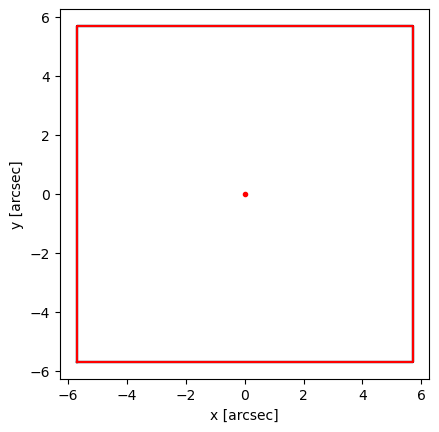

In [73]:
src.plot()

L-Band Imaging

In [74]:
cmd_l = sim.UserCommands(use_instrument='METIS', set_modes=['img_lm'], 
                        properties={"!OBS.exptime": 3600})
metis_l = sim.OpticalTrain(cmd_l)
metis_l['skycalc_atmosphere'].include=False
metis_l['detector_linearity'].include=False
metis_l['quantization'].include=False

In [75]:
metis_l.observe(src)
hdus_l = metis_l.readout()

 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


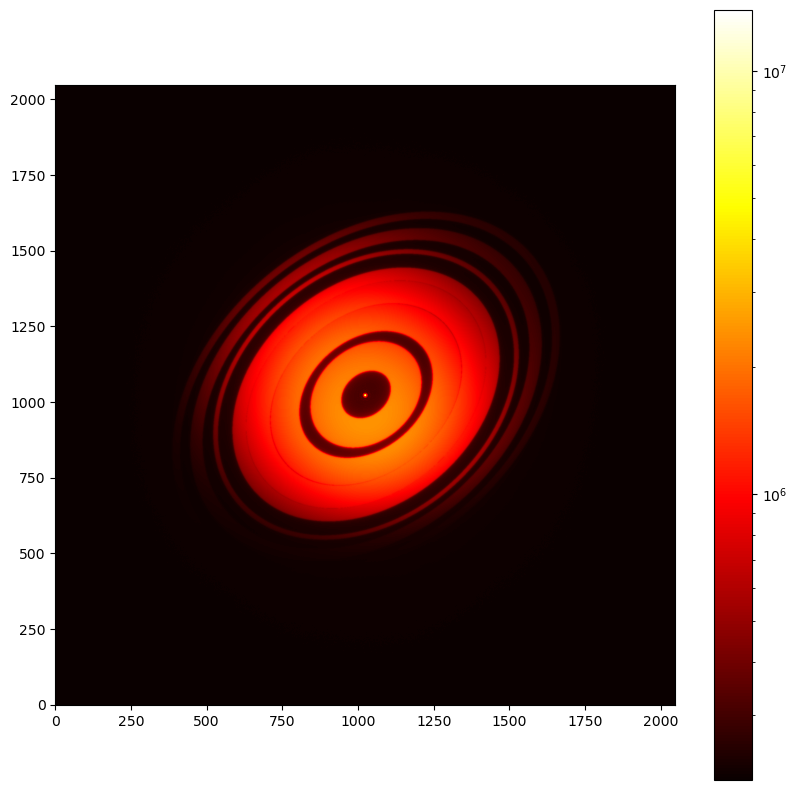

In [76]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_l[0][1].data, norm=LogNorm(), origin='lower', cmap='hot')
plt.colorbar()

In [77]:
metis_l.effects

element,name,class,included
str16,str27,str28,str8
armazones,skycalc_atmosphere,SkycalcTERCurve,False
ELT,telescope_reflection,SurfaceList,True
METIS,common_fore_optics,SurfaceList,True
METIS,adc_wheel : [const_90],ADCWheel,const_90
METIS,slit_wheel : [False],SlitWheel,False
METIS,cold_stop,PupilTransmission,True
METIS,common_fits_keywords,ExtraFitsKeywords,True
METIS_IMG_LM,img_lm_optics,SurfaceList,True
METIS_IMG_LM,filter_wheel : [Lp],FilterWheel,True


In [78]:
cmd_n = sim.UserCommands(use_instrument='METIS', set_modes=['img_n'], 
                        properties={"!OBS.exptime": 3600})
metis_n = sim.OpticalTrain(cmd_n)
metis_n['skycalc_atmosphere'].include=False
metis_n['detector_linearity'].include=False
metis_n['chop_nod'].include=False
metis_n['detector_readout_parameters'].include=False
metis_n['quantization'].include=False

In [79]:
metis_n.observe(src)
hdus_n = metis_n.readout()

 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.75s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


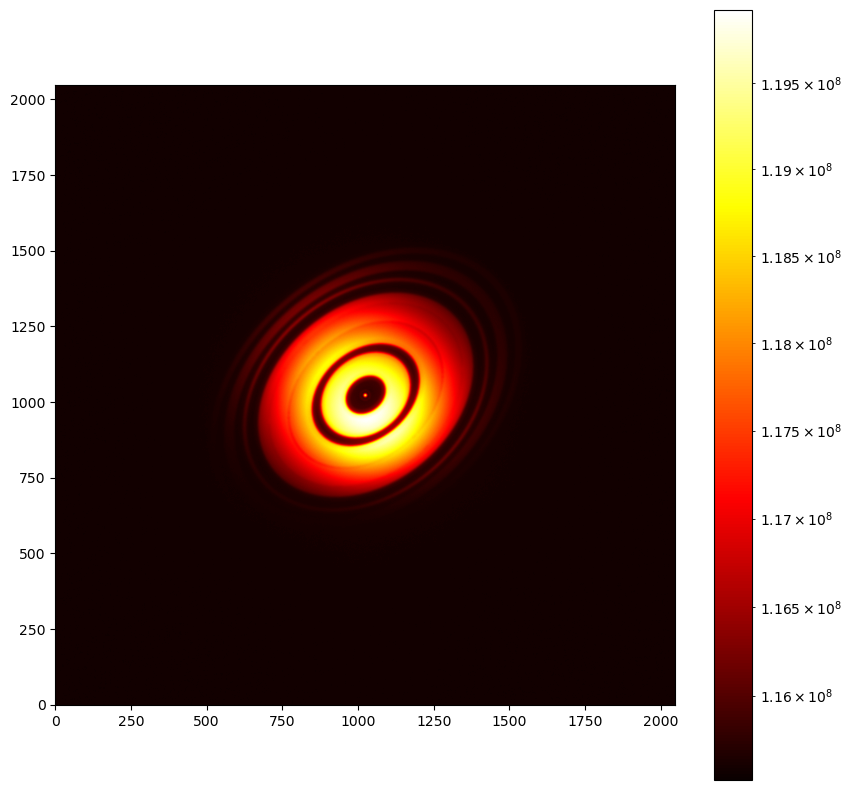

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_n[0][1].data, norm=LogNorm(), origin='lower', cmap='hot')
plt.colorbar()

In [81]:
metis_n.effects

element,name,class,included
str23,str27,str28,bool
armazones,skycalc_atmosphere,SkycalcTERCurve,False
ELT,telescope_reflection,SurfaceList,True
METIS,common_fore_optics,SurfaceList,True
METIS,adc_wheel : [False],ADCWheel,False
METIS,slit_wheel : [False],SlitWheel,False
METIS,cold_stop,PupilTransmission,True
METIS,common_fits_keywords,ExtraFitsKeywords,True
METIS_IMG_N,img_n_optics,SurfaceList,True
METIS_IMG_N,filter_wheel : [N2],FilterWheel,True


IFU Spectroscopy

In [23]:
hdul1_lms = fits.open('ring1.fits') 
hdul1_lms[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul1_lms[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul1_lms[0].header["CRVAL1"] = 0
hdul1_lms[0].header["CRVAL2"] = 0
hdul1_lms[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul1_lms[0].header["CRPIX2"] = 1000.5
hdul1_lms[0].header["CUNIT1"] = "deg"
hdul1_lms[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring1_lms = sim.Source(image_hdu=hdul1_lms[0], flux=flux_src)

In [24]:
hdul2_lms = fits.open('ring2.fits') 
hdul2_lms[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul2_lms[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul2_lms[0].header["CRVAL1"] = 0
hdul2_lms[0].header["CRVAL2"] = 0
hdul2_lms[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul2_lms[0].header["CRPIX2"] = 1000.5
hdul2_lms[0].header["CUNIT1"] = "deg"
hdul2_lms[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring2_lms = sim.Source(image_hdu=hdul2_lms[0], flux=flux_src)

In [25]:
hdul3_lms = fits.open('ring3.fits') 
hdul3_lms[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul3_lms[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul3_lms[0].header["CRVAL1"] = 0
hdul3_lms[0].header["CRVAL2"] = 0
hdul3_lms[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul3_lms[0].header["CRPIX2"] = 1000.5
hdul3_lms[0].header["CUNIT1"] = "deg"
hdul3_lms[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring3_lms = sim.Source(image_hdu=hdul3_lms[0], flux=flux_src)

In [26]:
hdul4_lms = fits.open('ring4.fits') 
hdul4_lms[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul4_lms[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul4_lms[0].header["CRVAL1"] = 0
hdul4_lms[0].header["CRVAL2"] = 0
hdul4_lms[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul4_lms[0].header["CRPIX2"] = 1000.5
hdul4_lms[0].header["CUNIT1"] = "deg"
hdul4_lms[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring4_lms = sim.Source(image_hdu=hdul4_lms[0], flux=flux_src)

In [27]:
hdul5_lms = fits.open('ring5.fits') 
hdul5_lms[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul5_lms[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul5_lms[0].header["CRVAL1"] = 0
hdul5_lms[0].header["CRVAL2"] = 0
hdul5_lms[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul5_lms[0].header["CRPIX2"] = 1000.5
hdul5_lms[0].header["CUNIT1"] = "deg"
hdul5_lms[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring5_lms = sim.Source(image_hdu=hdul5_lms[0], flux=flux_src)

In [28]:
hdul6_lms = fits.open('ring6.fits') 
hdul6_lms[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul6_lms[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul6_lms[0].header["CRVAL1"] = 0
hdul6_lms[0].header["CRVAL2"] = 0
hdul6_lms[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul6_lms[0].header["CRPIX2"] = 1000.5
hdul6_lms[0].header["CUNIT1"] = "deg"
hdul6_lms[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring6_lms = sim.Source(image_hdu=hdul6_lms[0], flux=flux_src)

In [29]:
hdul7_lms = fits.open('ring7.fits') 
hdul7_lms[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul7_lms[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul7_lms[0].header["CRVAL1"] = 0
hdul7_lms[0].header["CRVAL2"] = 0
hdul7_lms[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul7_lms[0].header["CRPIX2"] = 1000.5
hdul7_lms[0].header["CUNIT1"] = "deg"
hdul7_lms[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_ring7_lms = sim.Source(image_hdu=hdul7_lms[0], flux=flux_src)

In [30]:
src_lms = src_star + src_ring1_lms + src_ring2_lms + src_ring3_lms + src_ring4_lms + src_ring5_lms + src_ring6_lms + src_ring7_lms

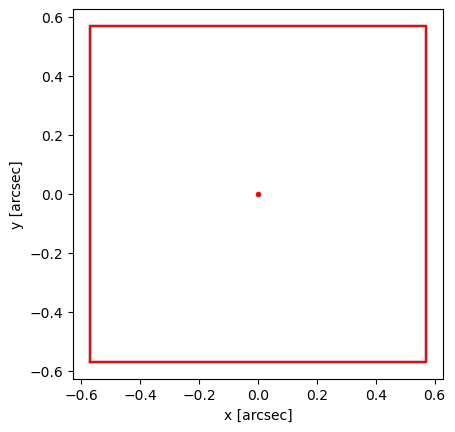

In [31]:
src_lms.plot()

In [32]:
cmd_lms = sim.UserCommands(
    use_instrument="METIS",
    set_modes=['lms'],
    properties={
        "!OBS.wavelen": 3.555,

        # These !SIM.spectral_* properties make the simulation faster, but less precise.
        # Comment them out for your final simulations.
        #"!SIM.spectral_bin_width": 1e-3,
        #"!SIM.spectral_resolution": 1000,
       
    })

metis_lms = sim.OpticalTrain(cmd_lms)
metis_lms['skycalc_atmosphere'].include=False

In [33]:
metis_lms.observe(src_lms)

 FOV effects:  50%|██████████████████████████████████▌                                  | 1/2 [02:00<02:00, 120.31s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 1
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 2
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 3
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 4
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 5
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 6
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 7
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 8
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 9
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 10
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 11
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 12
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 13
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 14
astar.scopesim.effects.spectral_trace_list_utils - Mappin


 FOVs: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [03:34<00:00, 214.60s/it]
 Image Plane effects: 0it [00:00, ?it/s]


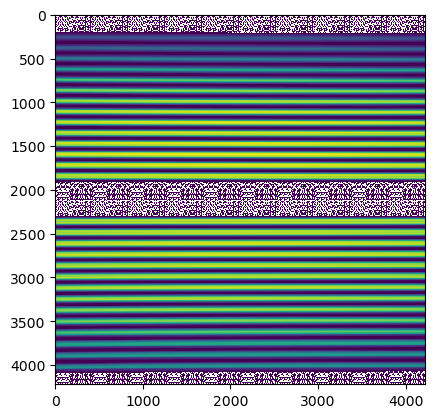

In [34]:
ip = metis_lms.image_planes[0]

plt.imshow(ip.data, norm=LogNorm())

In [35]:
hdul_lms = metis_lms.readout(exptime=3600.)[0]

astar.scopesim.effects.electronic - WARNING: DIT = 1.000 s < MINDIT = 1.300 s
astar.scopesim.detector.detector_array - Extracting from 4 detectors...
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 712590 negative pixels
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 706694 negative pixels
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 798501 negative pixels
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 798687 negative pixels
astar.scopesim.effects.electronic - WARNING: DIT = 1.000 s < MINDIT = 1.300 s


In [36]:
len(hdul_lms)

5

In [37]:
data_raw = hdul_lms[1].data

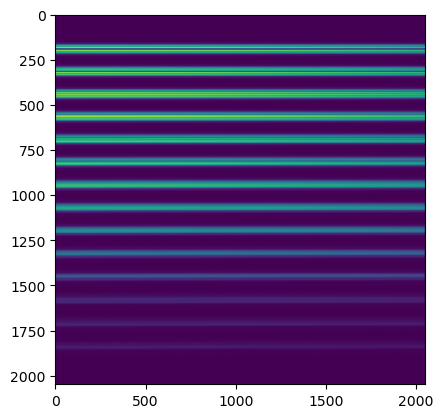

In [38]:
plt.imshow(data_raw)

In [39]:
rectified = metis_lms["lms_spectral_traces"].rectify_cube(hdul_lms)

astar.scopesim.effects.metis_lms_trace_list - Computing interpolation functions
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 1
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 2
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 3
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 4
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 

In [40]:
rectified.data.shape

(5517, 28, 110)

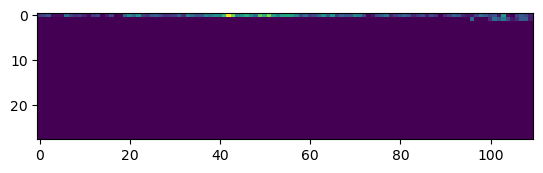

In [41]:
plt.imshow(rectified.data[3,:,:])

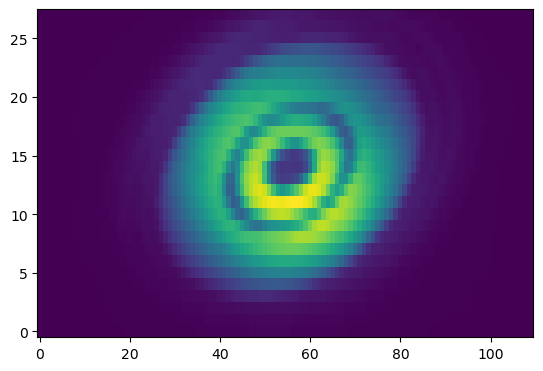

In [42]:
plt.imshow(rectified.data.sum(axis=0), aspect=2.6, origin='lower')

Long Slit Spectroscopy

In [82]:
exptime = 3600.   # seconds
cmd_lss = sim.UserCommands(use_instrument="METIS", set_modes=["lss_l"],
                      properties={"!OBS.dit": 2,
                                  "!OBS.ndit": 1800,
                                 "!SIM.spectral.spectral_resolution": 20000,
                                 "!SIM.spectral.spectral_bin_width": 2e-4,})

metis_lss = sim.OpticalTrain(cmd_lss)

In [83]:
metis_lss.observe(src)
hdus_lss = metis_lss.readout(detector_readout_mode="auto")[0]

 FOV effects:  50%|███████████████████████████████████                                   | 1/2 [00:39<00:39, 39.32s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping METIS LSS L



 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:54<00:00, 54.82s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.effects.electronic - Detector mode set to fast
astar.scopesim.detector.detector_array - Extracting from 1 detectors...


astar.scopesim.effects.electronic - Detector mode set to fast


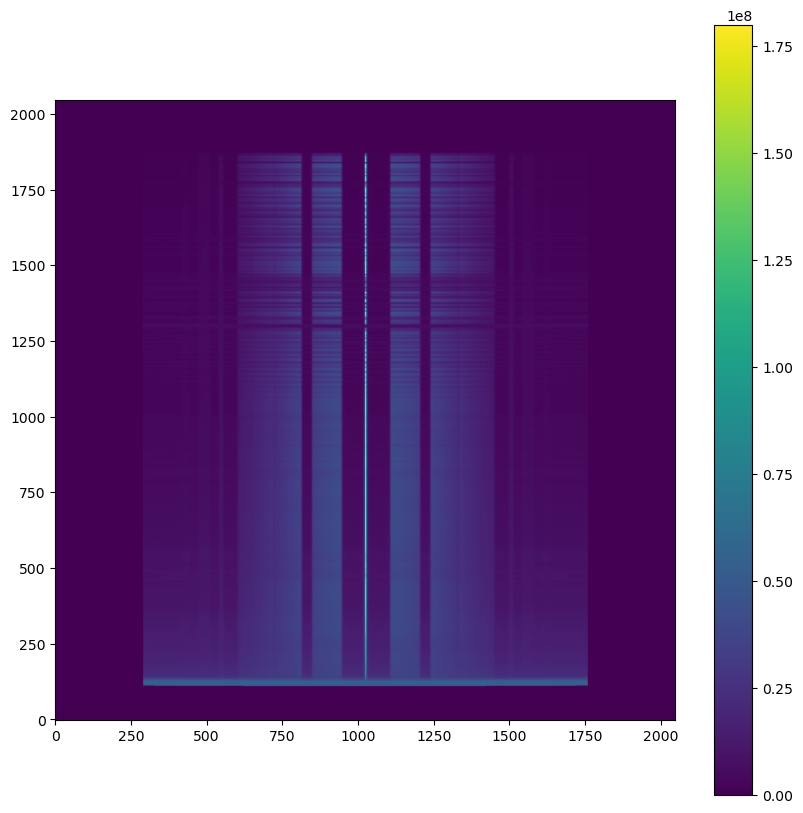

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_lss[1].data, origin='lower')
plt.colorbar()

In [85]:
sky = sim.source.source_templates.empty_sky()

In [86]:
metis_lss.observe(sky, update=True)
hdus_sky = metis_lss.readout(detector_readout_mode="auto")[0]

 FOV effects:  50%|███████████████████████████████████                                   | 1/2 [00:09<00:09,  9.09s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping METIS LSS L



 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:22<00:00, 22.18s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.effects.electronic - Detector mode set to slow
astar.scopesim.detector.detector_array - Extracting from 1 detectors...


astar.scopesim.effects.electronic - Detector mode set to slow


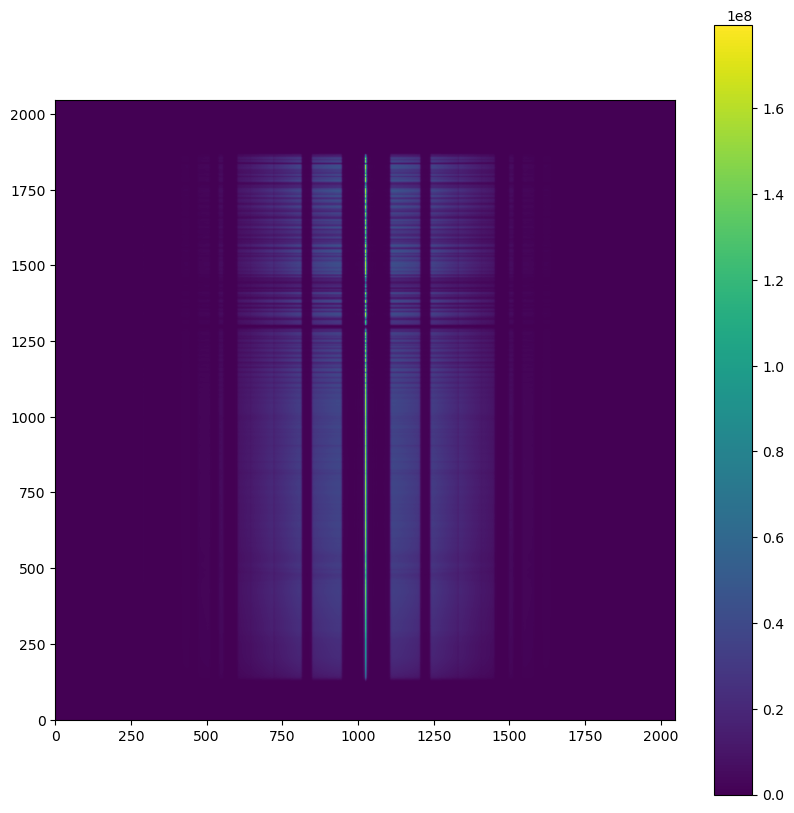

In [87]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_lss[1].data - hdus_sky[1].data, origin='lower')
plt.colorbar()

In [88]:
metis_lss.image_planes[0].data.sum()

4212836923.9253044

In [89]:
hdus_sky[1].data.sum()

15166968442725.271

In [90]:
hdus_lss[1].data.sum()

38826751063074.164

In [91]:
spectrum_l = hdus_lss[1].data - hdus_sky[1].data

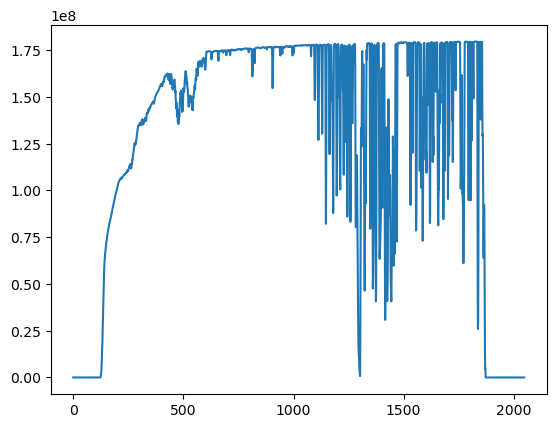

In [92]:
plt.plot(spectrum_l[:,1025]) #Star

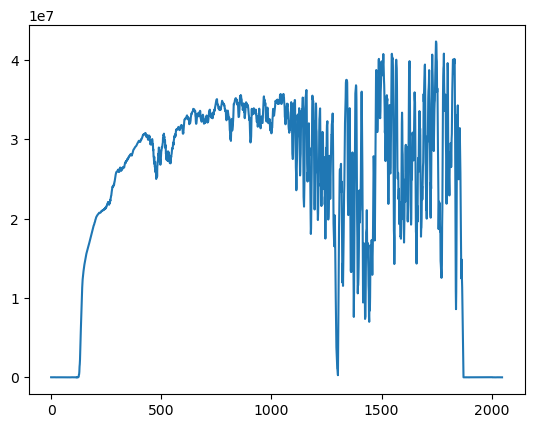

In [93]:
plt.plot(spectrum_l[:,900]) #Ring 7

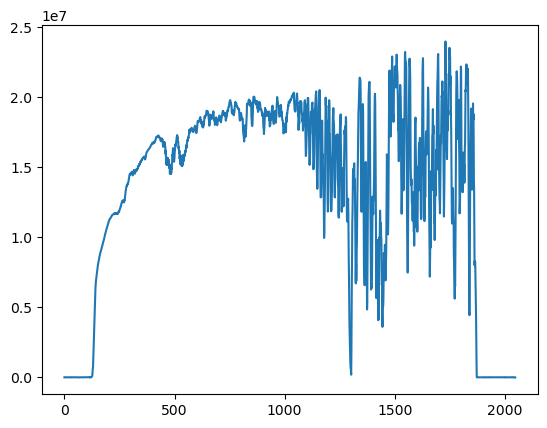

In [94]:
plt.plot(spectrum_l[:,725]) #Ring 6

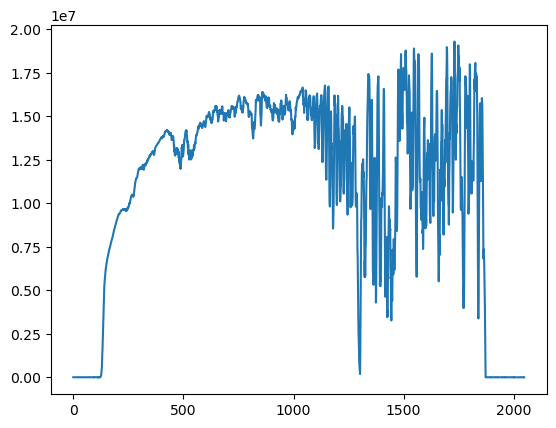

In [95]:
plt.plot(spectrum_l[:,675]) #Ring 5

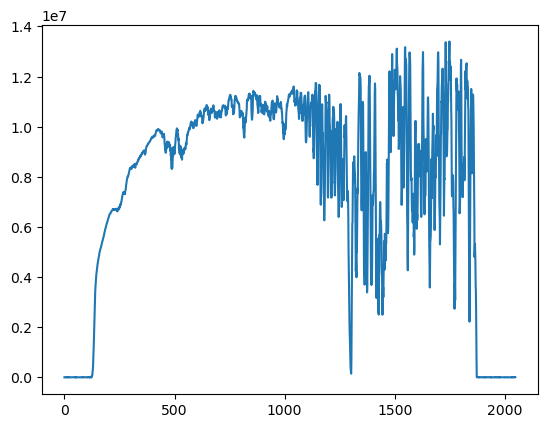

In [96]:
plt.plot(spectrum_l[:,625]) #Ring 4

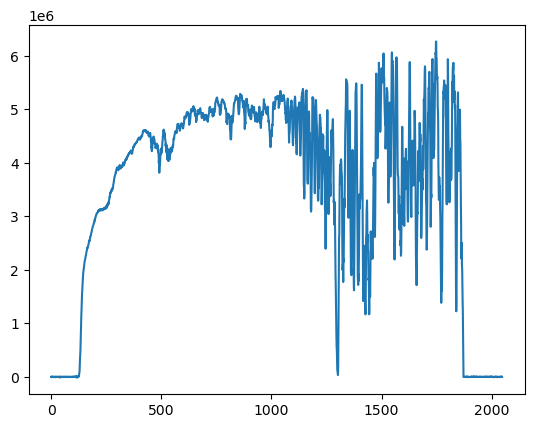

In [97]:
plt.plot(spectrum_l[:,550]) #Ring 3

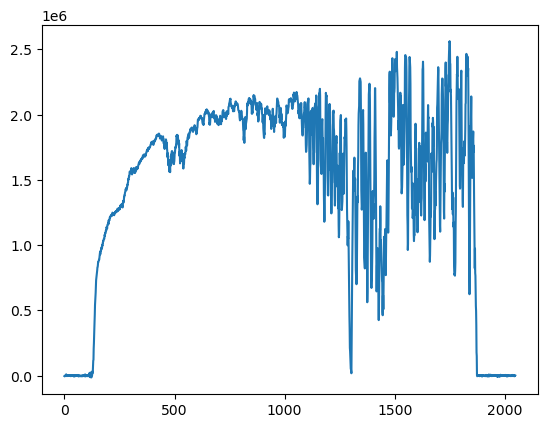

In [98]:
plt.plot(spectrum_l[:,475]) #Ring 2

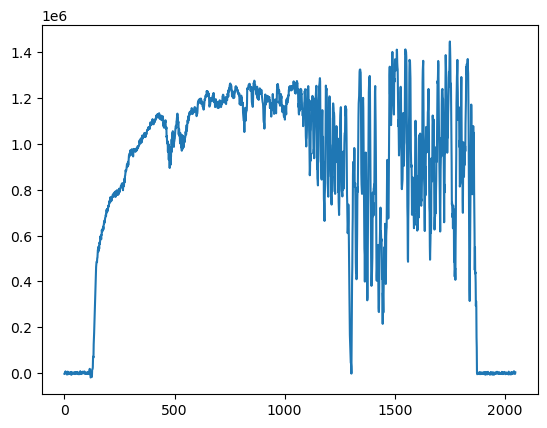

In [99]:
plt.plot(spectrum_l[:,425]) #Ring 1

In [100]:
cmd_lss_n = sim.UserCommands(use_instrument="METIS", set_modes=['lss_n'],
                      properties={"!OBS.dit": 2,
                                  "!OBS.ndit": 1800,
                                 "!SIM.spectral.spectral_resolution": 20000,
                                 "!SIM.spectral.spectral_bin_width": 2e-4,})
metis_lss_n = sim.OpticalTrain(cmd_lss_n)

In [101]:
metis_lss_n['spectral_traces'].include=True

In [102]:
metis_lss_n['detector_linearity'].include=False

In [103]:
metis_lss_n.observe(src)
hdus_lss_n = metis_lss_n.readout(detector_readout_mode="auto")[0]

 FOV effects:  50%|██████████████████████████████████▌                                  | 1/2 [03:24<03:24, 204.83s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping METIS LSS N



 FOVs: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [04:19<00:00, 259.86s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.effects.electronic - Detector mode set to low_capacity
astar.scopesim.detector.detector_array - Extracting from 1 detectors...


astar.scopesim.effects.electronic - Detector mode set to low_capacity


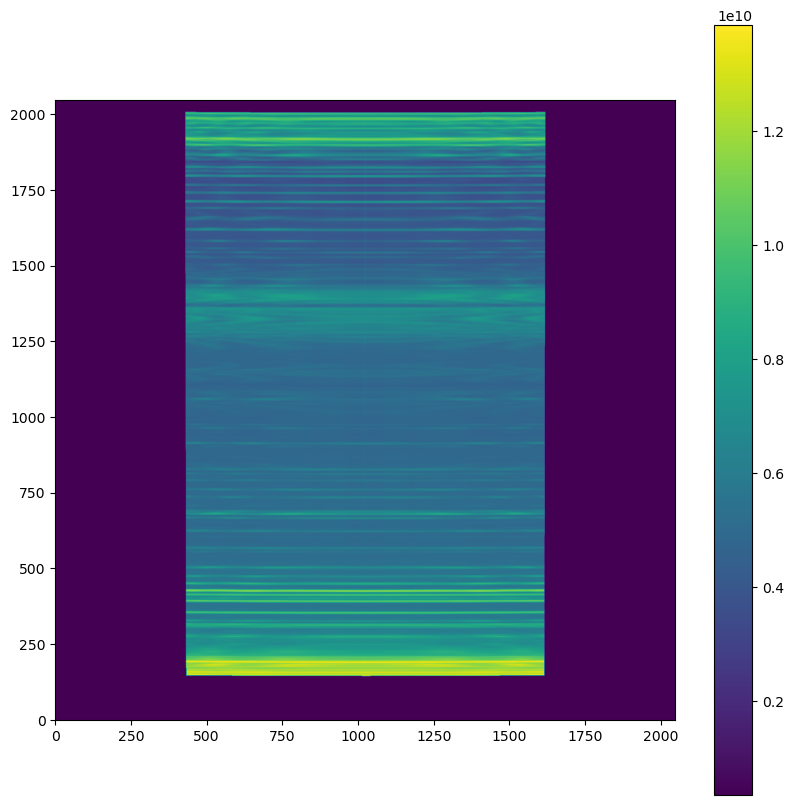

In [104]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_lss_n[1].data, origin='lower')
plt.colorbar()

In [105]:
metis_lss_n.observe(sky)
hdus_sky_n = metis_lss_n.readout(detector_readout_mode="auto")[0]

 FOV effects:  50%|███████████████████████████████████                                   | 1/2 [00:58<00:58, 58.64s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping METIS LSS N



 FOVs: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [01:44<00:00, 104.28s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.effects.electronic - Detector mode set to low_capacity


astar.scopesim.detector.detector_array - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Detector mode set to low_capacity


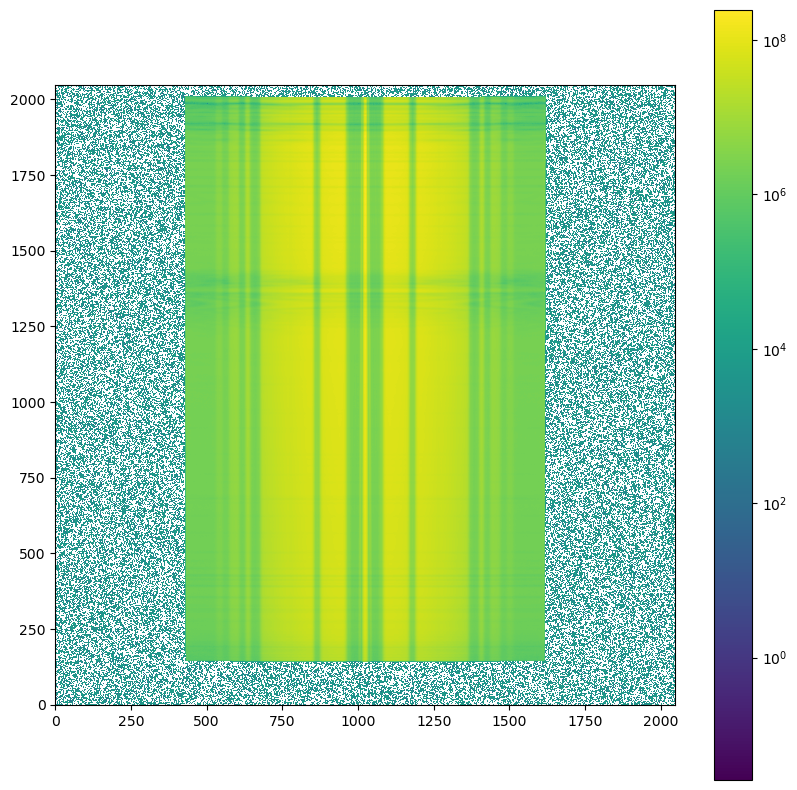

In [106]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_lss_n[1].data - hdus_sky_n[1].data, norm=LogNorm(), origin='lower')
plt.colorbar()

In [107]:
metis_lss_n.effects

element,name,class,included
str23,str27,str28,str6
armazones,skycalc_atmosphere,SkycalcTERCurve,True
ELT,telescope_reflection,SurfaceList,True
METIS,common_fore_optics,SurfaceList,True
METIS,adc_wheel : [False],ADCWheel,False
METIS,slit_wheel : [D-57_1],SlitWheel,D-57_1
METIS,cold_stop,PupilTransmission,True
METIS,common_fits_keywords,ExtraFitsKeywords,True
METIS_IMG_N,img_n_optics,SurfaceList,True
METIS_IMG_N,filter_wheel : [N_spec],FilterWheel,True


In [110]:
spectrum_n = hdus_lss_n[1].data - hdus_sky_n[1].data

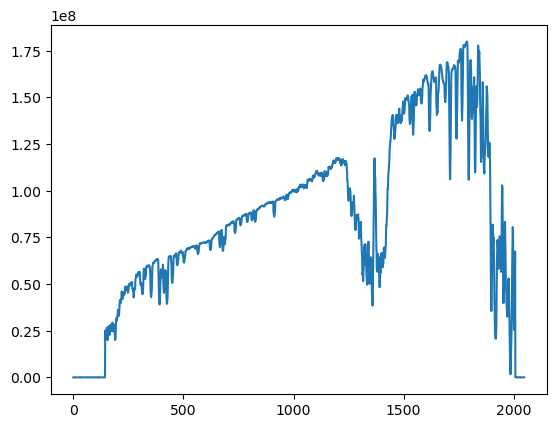

In [111]:
plt.plot(spectrum_n[:,1025]) #Star

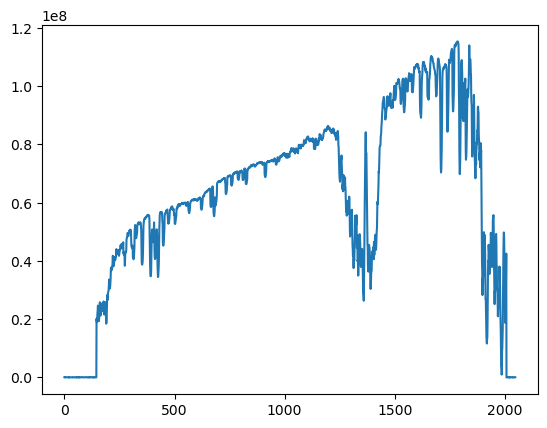

In [112]:
plt.plot(spectrum_n[:,925]) #Ring 7

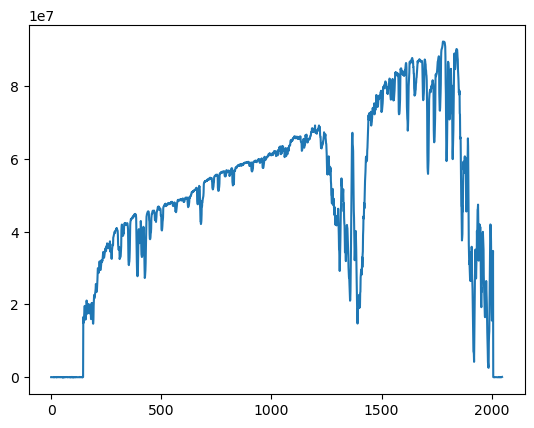

In [113]:
plt.plot(spectrum_n[:,825]) #Ring 6

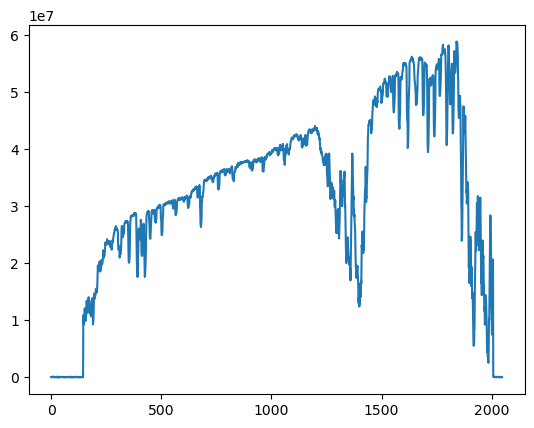

In [114]:
plt.plot(spectrum_n[:,750]) #Ring 5

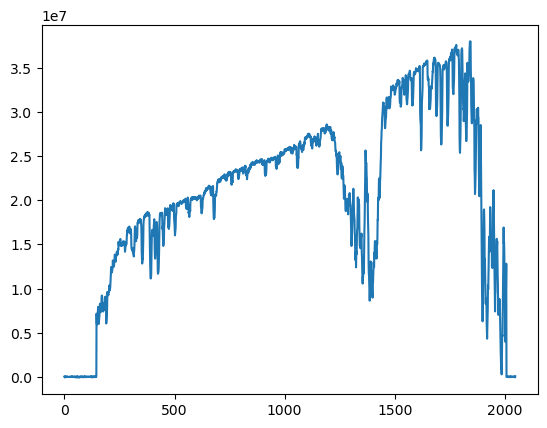

In [115]:
plt.plot(spectrum_n[:,700]) #Ring 4

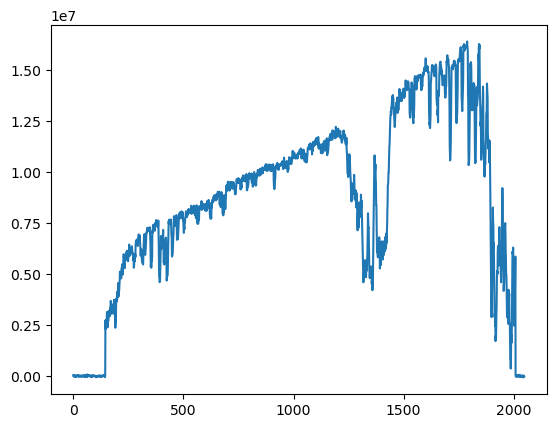

In [116]:
plt.plot(spectrum_n[:,635]) #Ring 3

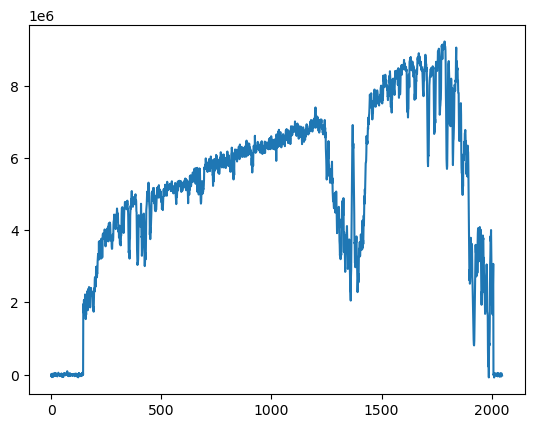

In [117]:
plt.plot(spectrum_n[:,595]) #Ring 2

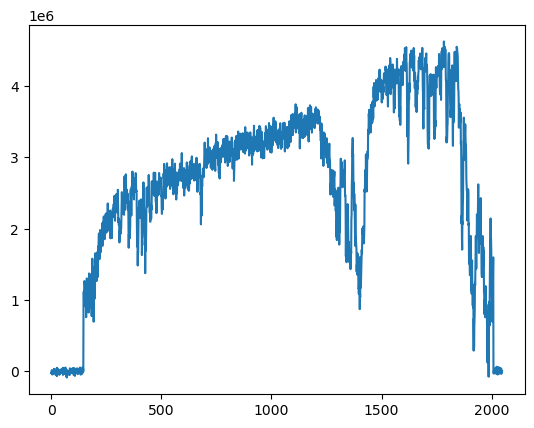

In [118]:
plt.plot(spectrum_n[:,535]) #Ring 1